# Exploring Dandiset 001359: Human Patch-seq Data

**Disclaimer:** This notebook was automatically generated by an AI assistant and has not been fully verified. Users should exercise caution when interpreting the code or results and should independently verify any critical findings.

## Dandiset Overview

This notebook explores Dandiset 001359, titled "20250331_AIBS_Patchseq_human", which contains Patch-seq data from human cells. This multimodal dataset includes electrophysiology recordings using both current clamp and voltage clamp techniques.

You can find the Dandiset here: https://dandiarchive.org/dandiset/001359/0.250401.1603

## Notebook Contents

This notebook demonstrates how to:

1. Load the Dandiset and list its assets using the DANDI API.
2. Load a specific NWB file from the Dandiset.
3. Examine the structure and metadata of the NWB file.
4. Visualize example electrophysiology data (current clamp and voltage clamp) from the NWB file.
5. Access other relevant data and metadata within the NWB file, such as sweep tables and detected spikes.

## Required Packages

This notebook requires the following Python packages:

* dandi
* pynwb
* h5py
* remfile
* numpy
* matplotlib
* pandas

## Loading the Dandiset and Assets

We will use the `dandi` Python client to connect to the DANDI archive and access the specified Dandiset.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001359", "0.250401.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603

First 5 assets:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb (ID: 67dc935f-cbc1-4255-bfbf-b8a3b21dacf9)
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb (ID: 6ea1c410-f443-44ef-a471-41fdf7bc8760)
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb (ID: c269347a-2d4b-4b6a-8b7c-2ef303ff503d)
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb (ID: f9663375-c4d6-4a9a-941f-c93c8a7b333a)
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb (ID: e11626f5-2176-48fc-9c4e-26da02787ba3)


## Loading an NWB file

The Dandiset contains multiple NWB files. We will load one specific file for demonstration: `sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb`.

We can construct the download URL for this asset using its Asset ID.

In [2]:
import pynwb
import h5py
import remfile

# Define the NWB file URL
nwb_url = "https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/"

# Load the NWB file
# This uses remfile to access the remote file without downloading the entire file
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("NWB file loaded successfully.")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.


## Exploring NWB File Contents

The loaded NWB object (`nwb`) provides access to the data and metadata within the file. We can explore its structure to understand the available information.

Some key sections include:

* `nwb.acquisition`: Contains acquired data, such as electrophysiology recordings.
* `nwb.stimulus`: Contains stimulus data.
* `nwb.icephys_electrodes`: Information about the intracellular electrodes used.
* `nwb.devices`: Information about the recording device.
* `nwb.intervals['epochs']`: Time intervals representing experimental epochs.
* `nwb.sweep_table`: Table summarizing sweeps in the recording.
* `nwb.processing['spikes']`: Contains data related to detected spikes.

Let's print some basic metadata from the NWB file.

In [3]:
print(f"Session ID: {nwb.session_id}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject age: {nwb.subject.age}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experiment description: {nwb.data_collection}")

Session ID: 1207262032
Subject ID: 1203384279
Subject sex: M
Subject age: P21170.0D
Session start time: 2022-09-06 17:44:39.146000+00:00
Experiment description:   Specified StimSet file at C:/ProgramData/AllenInstitute/MIES/MIESHDF5Files/SavedStimSets/PS_Stimsets_2022_08_11.nwb loaded successfully.
  Device used for pressure regulation: Pressure1and2 (NI)
  path: "C:/ProgramData/AllenInstitute/MIES/MIESData:"
  Please be patient while we export all existing acquired content of all devices to NWB
  The stimset "pink1" can not be exported as it can not be recreated.
  The stimset "pink1sub" can not be exported as it can not be recreated.
  The stimset "pink1supra" can not be exported as it can not be recreated.
  The stimset "pink2" can not be exported as it can not be recreated.
  The stimset "pink2sub" can not be exported as it can not be recreated.
  The stimset "pink2supra" can not be exported as it can not be recreated.
  Start Sciencing
  Control check_channelSel_AD_0 from config f

We can also list the available data series in the `acquisition` and `stimulus` sections.

In [4]:
print("\nAcquisition data series:")
for key in nwb.acquisition.keys():
    print(f"- {key} ({type(nwb.acquisition[key]).__name__})")

print("\nStimulus data series:")
for key in nwb.stimulus.keys():
    print(f"- {key} ({type(nwb.stimulus[key]).__name__})")


Acquisition data series:
- data_00000_AD0 (VoltageClampSeries)
- data_00001_AD0 (VoltageClampSeries)
- data_00002_AD0 (VoltageClampSeries)
- data_00003_AD0 (VoltageClampSeries)
- data_00004_AD0 (CurrentClampSeries)
- data_00005_AD0 (CurrentClampSeries)
- data_00006_AD0 (CurrentClampSeries)
- data_00007_AD0 (CurrentClampSeries)
- data_00008_AD0 (CurrentClampSeries)
- data_00009_AD0 (CurrentClampSeries)
- data_00010_AD0 (CurrentClampSeries)
- data_00011_AD0 (CurrentClampSeries)
- data_00012_AD0 (CurrentClampSeries)
- data_00013_AD0 (CurrentClampSeries)
- data_00014_AD0 (CurrentClampSeries)
- data_00015_AD0 (CurrentClampSeries)
- data_00016_AD0 (CurrentClampSeries)
- data_00017_AD0 (CurrentClampSeries)
- data_00018_AD0 (CurrentClampSeries)
- data_00019_AD0 (CurrentClampSeries)
- data_00020_AD0 (CurrentClampSeries)
- data_00021_AD0 (CurrentClampSeries)
- data_00022_AD0 (CurrentClampSeries)
- data_00023_AD0 (CurrentClampSeries)
- data_00024_AD0 (CurrentClampSeries)
- data_00025_AD0 (Curren

You can further explore the structure of the NWB file using tools like Neurosift. Below is a link to view this specific NWB file on Neurosift:

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=draft

## Visualizing Electrophysiology Data

Let's visualize a subset of the electrophysiology data to see the recorded signals. We will plot an example Current Clamp recording and an example Voltage Clamp recording.

### Example 1: Current Clamp Recording ($\texttt{data\_00004\_AD0}$) and Stimulus ($\texttt{data\_00004\_DA0}$)

This example shows a current clamp recording where current is injected into the cell and the resulting voltage response is measured.

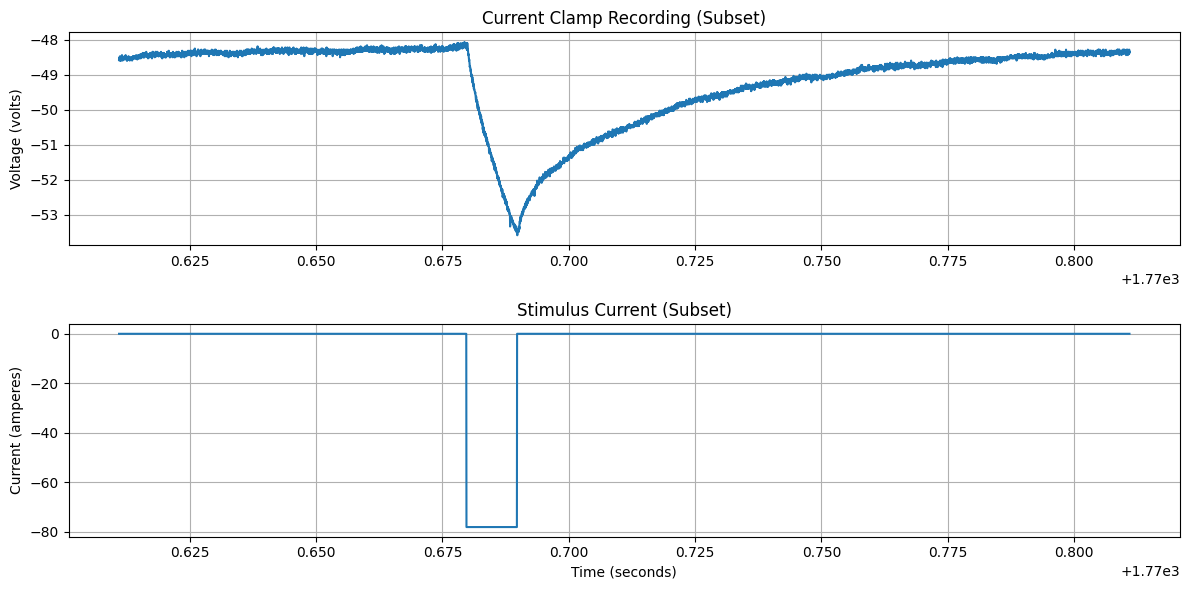

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get the Current Clamp recording and stimulus series
voltage_series = nwb.acquisition["data_00004_AD0"]
stimulus_series = nwb.stimulus["data_00004_DA0"]

# Extract a subset of data and timestamps for plotting
# We are using the first 10000 data points as a subset for demonstration.
num_points = 10000
voltage_data_subset = voltage_series.data[0:num_points]
stimulus_data_subset = stimulus_series.data[0:num_points]

# Calculate timestamps for the subset based on starting time and rate
# Assuming a constant sampling rate for the subset
if voltage_series.rate:
    timestamps_subset = voltage_series.starting_time + np.arange(num_points) / voltage_series.rate
elif voltage_series.timestamps:
    # If rate is not available, attempt to use timestamps if they exist and are not empty
    if voltage_series.timestamps.shape[0] >= num_points:
         timestamps_subset = voltage_series.timestamps[0:num_points]
    else:
        timestamps_subset = voltage_series.timestamps[:] # Use all if less than num_points
else:
    timestamps_subset = np.arange(num_points) # Fallback to indices if no time info


# Plot the data and stimulus
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(timestamps_subset, voltage_data_subset)
plt.ylabel(f"Voltage ({voltage_series.unit})")
plt.title("Current Clamp Recording (Subset)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(timestamps_subset, stimulus_data_subset)
plt.ylabel(f"Current ({stimulus_series.unit})")
plt.xlabel(f"Time ({voltage_series.starting_time_unit})")
plt.title("Stimulus Current (Subset)")
plt.grid(True)

plt.tight_layout()
plt.show()

In this current clamp recording subset, we observe a clear hyperpolarizing response in the voltage trace following the brief negative current injection.

### Example 2: Voltage Clamp Recording ($\texttt{data\_00000\_AD0}$) and Stimulus ($\texttt{data\_00000\_DA0}$)

This example shows a voltage clamp recording where the voltage across the cell membrane is held constant and the resulting current is measured.

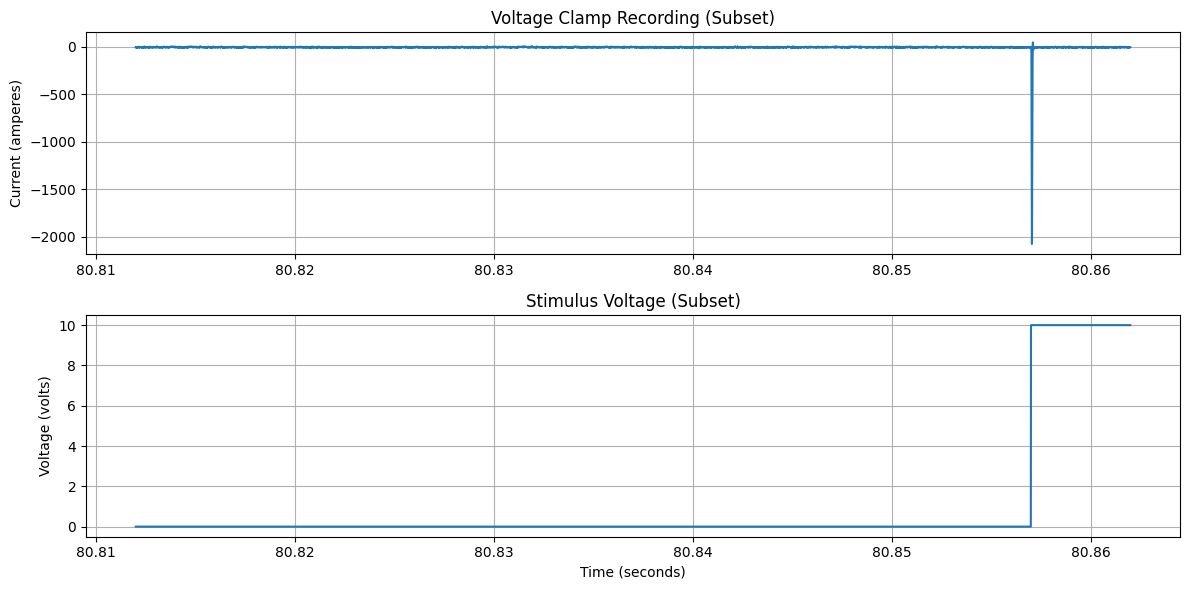

In [6]:
# Get the Voltage Clamp recording and stimulus series
current_series = nwb.acquisition["data_00000_AD0"]
stimulus_series = nwb.stimulus["data_00000_DA0"]

# Extract a subset of data and timestamps for plotting
# We are using the first 10000 data points as a subset for demonstration.
num_points = 10000
current_data_subset = current_series.data[0:num_points]
stimulus_data_subset = stimulus_series.data[0:num_points]

# Calculate timestamps for the subset based on starting time and rate
# Assuming a constant sampling rate for the subset
if current_series.rate:
    timestamps_subset = current_series.starting_time + np.arange(num_points) / current_series.rate
elif current_series.timestamps:
    # If rate is not available, attempt to use timestamps if they exist and are not empty
    if current_series.timestamps.shape[0] >= num_points:
         timestamps_subset = current_series.timestamps[0:num_points]
    else:
        timestamps_subset = current_series.timestamps[:] # Use all if less than num_points
else:
    timestamps_subset = np.arange(num_points) # Fallback to indices if no time info


# Plot the data and stimulus
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(timestamps_subset, current_data_subset)
plt.ylabel(f"Current ({current_series.unit})")
plt.title("Voltage Clamp Recording (Subset)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(timestamps_subset, stimulus_data_subset)
plt.ylabel(f"Voltage ({stimulus_series.unit})")
plt.xlabel(f"Time ({current_series.starting_time_unit})")
plt.title("Stimulus Voltage (Subset)")
plt.grid(True)

plt.tight_layout()
plt.show()

In this voltage clamp recording subset, we see a clear inward current response coinciding with the step increase in the stimulus voltage.

## Accessing Other Data and Metadata

The NWB file contains other valuable information, such as the sweep table and detected spikes.

### Sweep Table

The `sweep_table` provides information about the different sweeps within the recording.

In [7]:
import pandas as pd

# Access the sweep table
sweep_table = nwb.sweep_table

# Convert to pandas DataFrame for easier viewing
try:
    sweep_df = sweep_table.to_dataframe()
    print("\nSweep Table (first 5 rows):")
    print(sweep_df.head())
except Exception as e:
    print(f"Could not convert sweep_table to DataFrame: {e}")
    print("Sweep Table columns:", sweep_table.colnames)


Sweep Table (first 5 rows):
                                               series  sweep_number
id                                                                 
0   [data_00000_AD0 pynwb.icephys.VoltageClampSeri...             0
1   [data_00000_DA0 pynwb.icephys.VoltageClampStim...             0
2   [data_00001_AD0 pynwb.icephys.VoltageClampSeri...             1
3   [data_00001_DA0 pynwb.icephys.VoltageClampStim...             1
4   [data_00002_AD0 pynwb.icephys.VoltageClampSeri...             2


### Detected Spikes

The `processing['spikes']` section may contain information about detected spikes.

In [8]:
if 'spikes' in nwb.processing:
    spikes_module = nwb.processing['spikes']
    print("\nDetected Spikes Module:")
    print(f"Description: {spikes_module.description}")

    if spikes_module.data_interfaces:
        print("\nDetected Spike TimeSeries:")
        for key in spikes_module.data_interfaces.keys():
            timeseries = spikes_module.data_interfaces[key]
            print(f"- {key}: shape={timeseries.data.shape}, unit={timeseries.unit}, timestamps_shape={timeseries.timestamps.shape}")
            # You can access spike times with timeseries.timestamps[:]
    else:
        print("\nNo spike TimeSeries found in the spikes processing module.")
else:
    print("\n'spikes' processing module not found in this NWB file.")


Detected Spikes Module:
Description: detected spikes

Detected Spike TimeSeries:
- Sweep_10: shape=(0,), unit=seconds, timestamps_shape=(0,)
- Sweep_12: shape=(0,), unit=seconds, timestamps_shape=(0,)
- Sweep_14: shape=(0,), unit=seconds, timestamps_shape=(0,)
- Sweep_15: shape=(0,), unit=seconds, timestamps_shape=(0,)
- Sweep_17: shape=(0,), unit=seconds, timestamps_shape=(0,)
- Sweep_18: shape=(0,), unit=seconds, timestamps_shape=(0,)
- Sweep_20: shape=(0,), unit=seconds, timestamps_shape=(0,)
- Sweep_21: shape=(0,), unit=seconds, timestamps_shape=(0,)
- Sweep_23: shape=(0,), unit=seconds, timestamps_shape=(0,)
- Sweep_26: shape=(0,), unit=seconds, timestamps_shape=(0,)
- Sweep_33: shape=(1,), unit=seconds, timestamps_shape=(1,)
- Sweep_34: shape=(1,), unit=seconds, timestamps_shape=(1,)
- Sweep_36: shape=(1,), unit=seconds, timestamps_shape=(1,)
- Sweep_37: shape=(1,), unit=seconds, timestamps_shape=(1,)
- Sweep_38: shape=(2,), unit=seconds, timestamps_shape=(2,)
- Sweep_39: shape=

## Summary and Future Directions

This notebook demonstrated how to load and perform basic exploration of a human Patch-seq NWB file from Dandiset 001359. We visualized examples of current clamp and voltage clamp recordings and briefly looked at the sweep table and detected spikes (if any).

Future directions for analysis could include:

* Analyzing the full electrophysiology sweeps to characterize neuronal properties (e.g., input resistance, firing patterns).
* Correlating electrophysiology data with other modalities (e.g., gene expression or morphology) if available in other parts of the Dandiset.
* Performing more advanced analyses, such as spike shape analysis or detailed passive and active property extraction.

Remember to refer to the Dandiset's documentation and
metadata for more detailed information about the data and experimental procedures.


In [9]:
# Close the NWB file
io.close()
print("\nNWB file closed.")


NWB file closed.
